In [1]:
# Written by Anna C Helfeld C
# Fall 2018-Winter 2019

# This code uses my solutions written in Octave/Matlab as a guide
# Machine Learning (Andrew Ng class on Coursera)
# Homework 2: Logistic Regression

In [2]:
# Import libraries
from pandas import *
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

In [3]:
# Load microchip data
micro  = read_csv("ex2data2.txt",header=None)
micro.head() #check it looks ok

,0,1,2
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [4]:
micro.columns = ['Test1','Test2','Accepted']
micro.head()

,Test1,Test2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


Text(0,0.5,'Test2')

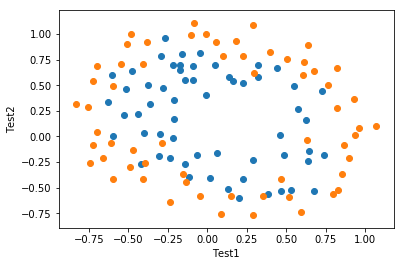

In [5]:
# Plot data to see what it looks like
Pos = micro[micro.Accepted == 1]
Neg = micro[micro.Accepted == 0]
plt.scatter(Pos.values[:,0], Pos.values[:,1])
plt.scatter(Neg.values[:,0], Neg.values[:,1])
plt.xlabel('Test1')
plt.ylabel('Test2')

In [6]:
#np.ones((Pos.values.size,1)) #test

In [7]:
#Atest=np.ones((5,1))
#Btest=np.zeros((5,2))
#Ctest=np.concatenate((Atest,Btest),1)
#Ctest

In [8]:
#temp1=np.multiply(np.power(micro.values[:,0],1),np.power(micro.values[:,1],0))

In [9]:
#temp1.shape=((micro.values[:,0].size,1))

#np.concatenate((micro.values,temp1),1)

In [10]:
# Define feature mapping function
# X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2 ...etc.
def map_features(X, deg): # deg=degree of polynomial
    Xnew = np.ones((X[:,0].size,1)) # Set up with bias term
    for i in range(1,deg+1):
        for j in range(0,i+1):
            temp1=np.multiply(np.power(X[:,0],i-j),np.power(X[:,1],j)) #element-wise multiplication
            temp1.shape=((X[:,0].size,1))
            Xnew = np.concatenate((Xnew,temp1),1)
    return Xnew

In [11]:
X_feat = micro.values[:,0:2] #Define an array of the 2 features; test1 and test2
X_nfeat = map_features(X_feat,6) #Transform to 28-feature array; 6th-order polymonial of test1 and test2

In [12]:
y_class = micro.values[:,2] #Define class array; 1=accepted
X_nfeat = map_features(X_feat,6)

In [13]:
# Use the scikit learn library to run logistic regression
clf = LogisticRegression(solver='liblinear',multi_class='ovr').fit(X_nfeat,y_class)

In [14]:
#Create grid for plotting
def frange(start, stop, step):
    i = start
    while i < stop:
        yield i
        i += step

In [15]:
# Plot decision boundary to check that the logistic regression worked
bins = 100
inc = 0.02
Xplot=np.zeros((bins,1))
Yplot=np.zeros((bins,1))
Zplot=np.zeros((bins,bins))
for i in range(0,bins):
    for j in range(0,bins):
        Xplot[i]=-float(1)+(inc*float(i))
        Yplot[j]=-float(1)+(inc*float(j))
        Xtemp = np.array((Xplot[i],Yplot[j]))
        Xtemp.shape=(1,2)
        Xtest = map_features(Xtemp,6)
        Zplot[i,j] = clf.predict(Xtest)

C:\Users\Anna\Anaconda2\lib\site-packages\matplotlib\contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


Text(0,0.5,'Test2')

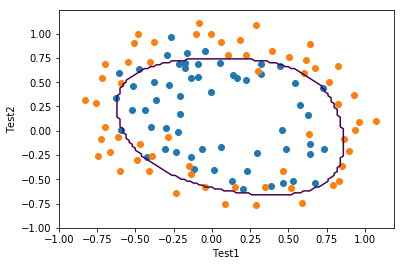

In [16]:
Xn, Yn = np.meshgrid(Xplot, Yplot)

plt.scatter(Pos.values[:,0], Pos.values[:,1])
plt.scatter(Neg.values[:,0], Neg.values[:,1])
plt.contour(Xn, Yn, Zplot, [0,0])
plt.xlabel('Test1')
plt.ylabel('Test2')

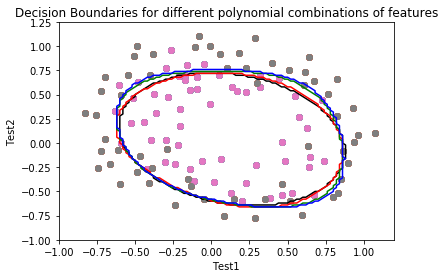

In [18]:
# Test different feature polynomial combinations
# Does it make a difference?
fp = np.array([2, 3, 6, 12]) #polynomials
clrs = ['k','r','g','b']
bins = 100
inc = 0.02

for k in range(0,fp.size):
    X_nfeat_t = map_features(X_feat,fp[k])
    clf = LogisticRegression(solver='liblinear',multi_class='ovr').fit(X_nfeat_t,y_class)
   
    for i in range(0,bins):
        for j in range(0,bins):
            Xplot[i]=-float(1)+(inc*float(i))
            Yplot[j]=-float(1)+(inc*float(j))
            Xtemp = np.array((Xplot[i],Yplot[j]))
            Xtemp.shape=(1,2)
            Xtest = map_features(Xtemp,fp[k])
            Zplot[i,j] = clf.predict(Xtest)
    
    Xn, Yn = np.meshgrid(Xplot, Yplot)
    plt.scatter(Pos.values[:,0], Pos.values[:,1])
    plt.scatter(Neg.values[:,0], Neg.values[:,1])
    plt.contour(Xn, Yn, Zplot, [0,0], colors=clrs[k])
    plt.xlabel('Test1')
    plt.ylabel('Test2')
    plt.title('Decision Boundaries for different polynomial combinations of features')